# Assignment 1: Building Neural Networks for Image Classification

## Overview
Welcome to Assignment 1! In this assignment, you'll dive into the fascinating realm of deep learning by building and training neural networks for image classification using the PyTorch framework. You'll work with two popular datasets: MNIST for image classification and CIFAR-100 for object classification. Throughout the assignment, you'll also fine-tune your models to achieve optimal results.

## Part 1: Image Classification on MNIST
In the first part of the assignment, your goal is to construct both a fully connected neural network and a convolutional neural network (CNN) for image classification using the MNIST dataset. The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9). Your task is to build models that can accurately classify these digits.

# Part 1a: Simple Fully Connected Neural Network - MNIST Classification

#Import Libraries

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [24]:
# Hyperparameters
owner ='chuangm' # Enter andrewID here
epoch = 5
learning_rate = 0.01
batch = 64

#Load MNIST Dataset

In [25]:
# Load MNIST dataset and apply transformations
# Do not change for first part, update from upcoming parts
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Do Not Change This Code
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch, shuffle=True)

# Do Not Change This Code
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch, shuffle=False)

#Initialise Fully Connected neural network Archictecture

In [26]:
# Initialize the models
# Define a simple fully connected neural network
class FCModel(nn.Module):
    def __init__(self):
        super(FCModel, self).__init__()
        # TODO: Define the layers for the fully connected neural network
        # Use nn.Flatten, nn.Linear, and nn.ReLU appropriately
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.act1 = nn.ReLU()
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        # TODO: Implement the forward pass of the fully connected neural network
        #pass
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc3(x)
        return x
fc_model = FCModel()

# Print the model architecture
print(fc_model)

# Define optimizers for the models
# TODO: Create an optimizer for the FCModel
fc_optimizer = torch.optim.Adam(fc_model.parameters(), lr= learning_rate)# TODO: Use optim.SGD or another optimizer and provide the parameters and learning rate

criterion = torch.nn.CrossEntropyLoss()#TODO define loss function using torch.nn that would be best for your usecase

FCModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (act1): ReLU()
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [27]:
# TODO: Modify the training loop
def train(model, optimizer, dataloader, epochs):
    train_losses = []  # For recording train losses
    test_losses = []   # For recording test losses

    #move model to device here , if needed
    # model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            optimizer.zero_grad()

            # TODO load inputs and labels to device
            inputs      = inputs.to(device)
            labels    = labels.to(device)
            # TODO Call model and get ouptuts
            logits  = model(inputs)
            # TODO: Calculate the loss using loss function
            # TODO:Replace with your custom loss calculation
            # uncomment after defining below correctly
            loss    = criterion(logits, labels)
            # call backward on loss
            loss.backward()
            # TODO Add optimiser  step
            optimizer.step()
            running_loss += loss.item()

        train_loss = running_loss / len(dataloader)
        train_losses.append(train_loss)
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss}")

        test_loss = evaluate_loss(model, testloader)
        test_losses.append(test_loss)
        print(f"Epoch {epoch+1}/{epochs} - Test Loss: {test_loss}")

    return train_losses, test_losses

# Define a function to evaluate loss without updating gradients
def evaluate_loss(model, dataloader):
    total_loss = 0.0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the device
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
    average_loss = total_loss / len(dataloader)
    return average_loss

# TODO: Train the fully connected model and record losses
# Use the train function to train the fc_model with fc_optimizer on the trainloader for a specified number of epochs (e.g., 5)
# Define Hyperparameters here
# Record the training and test losses in fc_train_losses and fc_test_losses respectively, pass hyperparameters
# Example: fc_train_losses, fc_test_losses = ...
fc_train_loss, fc_test_loss   = train(fc_model,fc_optimizer,trainloader, epoch)

Epoch 1/5 - Train Loss: 0.43295426616695387
Epoch 1/5 - Test Loss: 0.24821631581475068
Epoch 2/5 - Train Loss: 0.2615486701596965
Epoch 2/5 - Test Loss: 0.2444042616173815
Epoch 3/5 - Train Loss: 0.24377605051938087
Epoch 3/5 - Test Loss: 0.26316979981715655
Epoch 4/5 - Train Loss: 0.2359128203570668
Epoch 4/5 - Test Loss: 0.19994608151791676
Epoch 5/5 - Train Loss: 0.2370589391282722
Epoch 5/5 - Test Loss: 0.19931943264528873


In [28]:
# Evaluation
def evaluate(model, dataloader):
    correct = 0
    total = 0
    model.eval()  # Set the model to evaluation mode (e.g., disables dropout)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the same device as the model
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = (correct / total) * 100
    return accuracy

# Evaluate the models
fc_accuracy = evaluate(fc_model, testloader)

# Print test accuracy
print("Fully Connected Model Test Accuracy:", fc_accuracy)

Fully Connected Model Test Accuracy: 94.54


# Visualize Final Results: FCN- MNIST

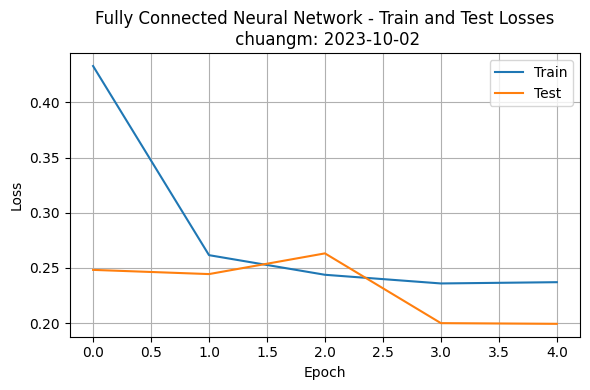

In [29]:
# Plot train and test losses for the fully connected neural network
import datetime
current_datetime = datetime.datetime.now()
timestamp_str = current_datetime.strftime('%Y-%m-%d')
plt.figure(figsize=(6, 4))
plt.plot(fc_train_loss, label='Train')
plt.plot(fc_test_loss, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Fully Connected Neural Network - Train and Test Losses\n {owner}: {timestamp_str}')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [30]:
import numpy as np

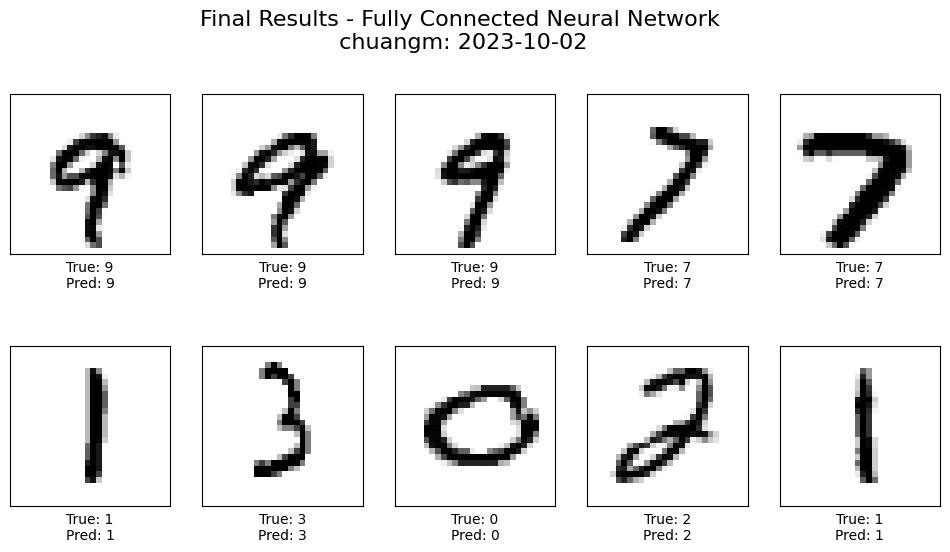

In [31]:
import datetime

current_datetime = datetime.datetime.now()
timestamp_str = current_datetime.strftime('%Y-%m-%d')

# Visualize the final results
plt.figure(figsize=(12, 6))
random_inds = np.random.choice(len(testset), 10)

for i, image_idx in enumerate(random_inds):
    test_image, test_label = testset[image_idx]
    test_image = test_image.unsqueeze(0)

    # Move the test_image tensor to the same device as the model (cuda or cpu)
    test_image = test_image.to(device)

    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Move the test_image tensor back to CPU for visualization
    test_image_cpu = test_image.cpu()
    plt.imshow(test_image_cpu.squeeze().numpy(), cmap=plt.cm.binary)

    with torch.no_grad():
        output = fc_model(test_image)
        predicted_label = torch.argmax(output).item()

    plt.xlabel(f"True: {test_label}\nPred: {predicted_label}")

plt.suptitle(f'Final Results - Fully Connected Neural Network\n {owner}: {timestamp_str}', fontsize=16)
plt.show()

# Part 1b: Convolutional Neural Network Architecture - MNIST Classification


In [32]:
# Hyperparameters
owner ='chuangm' # Enter andrewID here
epoch = 5
learning_rate = 0.001
batch = 64

#Load Dataset and Transforms

In [33]:
# Load MNIST dataset and apply transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch, shuffle=False)

In [34]:
# Define a CNN
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # TODO: Define the convolutional and fully connected layers for the CNN
        # Use nn.Conv2d, nn.MaxPool2d, nn.Linear, and nn.ReLU appropriately
        # Understand the sizes and shapes being passed , how many output neurons do you finally need for MNIST dataset ?
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.act1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(4608, 128)
        self.act2 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # TODO: Implement the forward pass of the CNN
        # pass
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        x = self.flatten(x)  # Flatten the input
        x = self.fc1(x)
        x = self.act2(x)
        x = self.fc2(x)
        return x

# Initialize the models
cnn_model = CNNModel().to(device)#TODO initialise and move to device

print(cnn_model)

# TODO: Create an optimizer for the CNNModel
cnn_optimizer = torch.optim.Adam(cnn_model.parameters(), lr= learning_rate)

# TODO: Define a custom loss function, by default implement what you think would be best for classification , justify your choice in key learnings
# You can define a custom loss function implementing the forward method(optional, can define your own function).
# For example:
class CustomLoss():
    def __init__(self):
        super(CustomLoss, self).__init__()
        # Define any parameters or initialization you need

    def forward(self, predicted, target):
        # Implement your custom loss computation here
        # This method should return the computed loss value, donot use torch.nn, define your own loss function
        pass

# criterion = CustomLoss()
criterion = torch.nn.CrossEntropyLoss()

CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (act1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=4608, out_features=128, bias=True)
  (act2): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [35]:
# TODO: Modify the training loop
def train(model, optimizer, dataloader, epochs):
    train_losses = []  # For recording train losses
    test_losses = []   # For recording test losses
    # model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            optimizer.zero_grad()

            inputs      = inputs.to(device)
            labels    = labels.to(device)
            # TODO Call model and get ouptuts
            logits  = model(inputs)
            # TODO: Calculate the loss using loss function
            # TODO:Replace with your custom loss calculation
            # uncomment after defining below correctly
            loss    = criterion(logits, labels)
            # call backward on loss
            loss.backward()
            # TODO Add optimiser  step
            optimizer.step()
            running_loss += loss.item()

        train_loss = running_loss / len(dataloader)
        train_losses.append(train_loss)
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss}")

        test_loss = evaluate_loss(model, testloader)
        test_losses.append(test_loss)
        print(f"Epoch {epoch+1}/{epochs} - Test Loss: {test_loss}")

    return train_losses, test_losses

# TODO: Train the CNN model and record losses
# Use the train function to train the cnn_model with cnn_optimizer on the trainloader for a specified number of epochs (e.g., 5)
# Define Hyperparameters here
# Record the training and test losses in cnn_train_losses and cnn_test_losses respectively
# Example: cnn_train_losses, cnn_test_losses = ...


# Define a function to evaluate loss without updating gradients
def evaluate_loss(model, dataloader):
    total_loss = 0.0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the device
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
    average_loss = total_loss / len(dataloader)
    return average_loss

cnn_train_losses, cnn_test_losses = train(cnn_model,cnn_optimizer,trainloader, epoch)

Epoch 1/5 - Train Loss: 0.15850057708534365
Epoch 1/5 - Test Loss: 0.05118339798067679
Epoch 2/5 - Train Loss: 0.055228326690575875
Epoch 2/5 - Test Loss: 0.0471811891319512
Epoch 3/5 - Train Loss: 0.037461962062474055
Epoch 3/5 - Test Loss: 0.04229816239596727
Epoch 4/5 - Train Loss: 0.02893300529783229
Epoch 4/5 - Test Loss: 0.04769151499018497
Epoch 5/5 - Train Loss: 0.022528034855788727
Epoch 5/5 - Test Loss: 0.05195988336215419


# Visualize Final Results: CNN- MNIST

In [36]:
# Evaluation
def evaluate(model, dataloader):
    correct = 0
    total = 0
    model.eval()  # Set the model to evaluation mode (e.g., disables dropout)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the same device as the model
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = (correct / total) * 100
    return accuracy

# Evaluate the CNN model
cnn_accuracy = evaluate(cnn_model, testloader)

# Print test accuracy
print("Final CNN Model Test Accuracy:", cnn_accuracy)

Final CNN Model Test Accuracy: 98.42999999999999


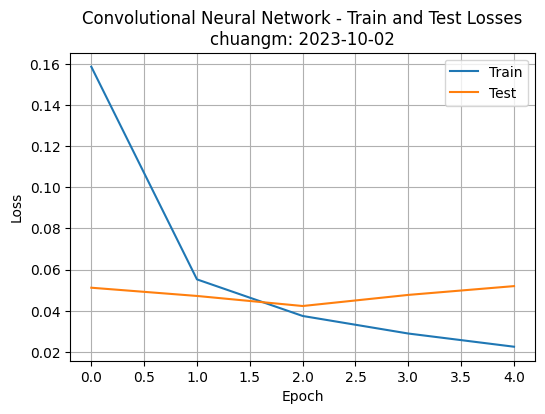

In [37]:
# Plot train and test losses for the Convolutional Neural Network Architecture
plt.figure(figsize=(6, 4))
plt.plot(cnn_train_losses, label='Train')
plt.plot(cnn_test_losses, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Convolutional Neural Network - Train and Test Losses\n{owner}: {timestamp_str}')
plt.legend()
plt.grid()

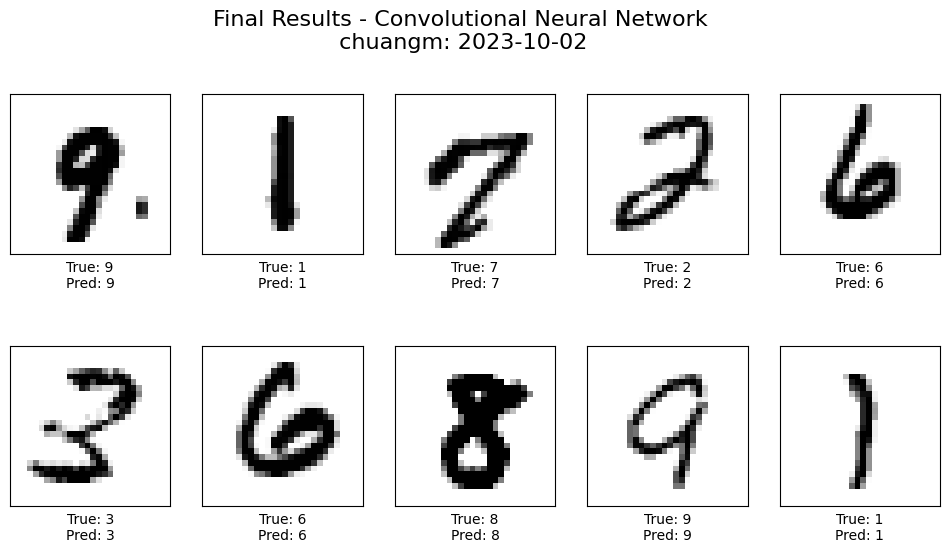

In [38]:
import datetime

current_datetime = datetime.datetime.now()
timestamp_str = current_datetime.strftime('%Y-%m-%d')

# Visualize the final results
plt.figure(figsize=(12, 6))
random_inds = np.random.choice(len(testset), 10)

for i, image_idx in enumerate(random_inds):
    test_image, test_label = testset[image_idx]
    test_image = test_image.unsqueeze(0)

    # Move the test_image tensor to the same device as the model (cuda or cpu)
    test_image = test_image.to(device)

    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Move the test_image tensor back to CPU for visualization
    test_image_cpu = test_image.cpu()
    plt.imshow(test_image_cpu.squeeze().numpy(), cmap=plt.cm.binary)

    with torch.no_grad():
        output = fc_model(test_image)
        predicted_label = torch.argmax(output).item()

    plt.xlabel(f"True: {test_label}\nPred: {predicted_label}")

plt.suptitle(f'Final Results - Convolutional Neural Network\n {owner}: {timestamp_str}', fontsize=16)
plt.show()
# Save Fig if you want

# PLOT T-SNE To Visualise Learning

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique used for visualizing high-dimensional data in lower-dimensional spaces. It's commonly used to explore patterns and relationships in complex data by mapping similar data points closer to each other in the lower-dimensional space.

To implement t-SNE without TensorFlow, you can use the scikit-learn library, which provides an easy-to-use implementation of t-SNE. Here's how you can implement t-SNE without TensorFlow and instructions for a student assignment:

Implement t-SNE with scikit-learn or custom written function

Understanding t-SNE:

Begin by introducing t-SNE to the students, explaining that it's a technique for visualizing high-dimensional data in 2D or 3D space.
Explain that t-SNE works by preserving pairwise distances between data points, trying to keep similar points close and dissimilar points farther apart in the lower-dimensional space.

(10000, 18432)


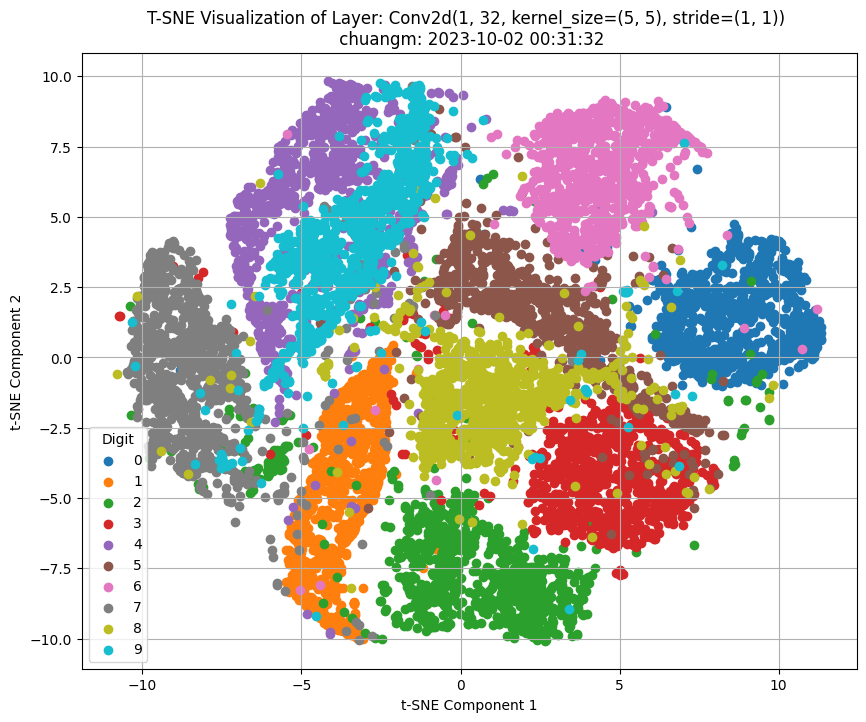

In [39]:
# Snapshot results and paste in Q1) Part3

from sklearn.manifold import TSNE
import datetime
current_datetime = datetime.datetime.now()
timestamp_str = current_datetime.strftime('%Y-%m-%d %H:%M:%S')

# Choose the layer for visualization (e.g., conv1 or conv2)
# TODO
selected_layer = cnn_model.conv1

# Extract activations from the selected layer for all test images
activations = []
with torch.no_grad():
    for inputs, _ in testloader:

      layer_output = selected_layer(inputs)
      activations.append(layer_output)
      # print(layer_output.shape)

activations = torch.cat(activations, dim=0)

# Convert activations to numpy array
activations_np = activations.numpy()
activations_np = activations_np.reshape(activations_np.shape[0],-1)
print(activations_np.shape)

# Apply t-SNE to reduce dimensions to 2 for visualization
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
activations_tsne = tsne.fit_transform(activations_np)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(
        activations_tsne[testset.targets.numpy() == i, 0],
        activations_tsne[testset.targets.numpy() == i, 1],
        label=str(i)
    )

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Digit')
plt.title(f'T-SNE Visualization of Layer: {selected_layer} \n {owner}: {timestamp_str}')
plt.grid(True)
plt.show()